# Image compression via cosine transform

## Setup

In [1]:
%load_ext autotime

In [2]:
import PIL
import matplotlib.pylab as plt
import numpy as np
import os
import scipy
import scipy.fftpack

time: 784 ms


## Load image

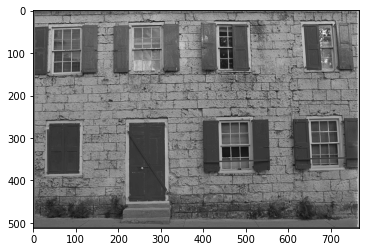

time: 338 ms


In [3]:
# load image
img = PIL.Image.open(os.path.join('..', 'data', 'kodim01.png'))
# convert to grayscale
img = img.convert('L')
# store as numpy array
img = np.array(img)

# fetch dimensions
H, W = img.shape

# show image
plt.imshow(img, cmap='gray')
plt.show()

# Cosine transform

### 1. Transform signal to frequency space via DCT

In [4]:
# DCT along y axis
freq = scipy.fftpack.dct(img.T, norm='ortho', n=H).T
# DCT along x axis
freq = scipy.fftpack.dct(freq, norm='ortho', n=W)

time: 46.6 ms


### 2. Filter in the frequency space

In [5]:
# specify how many dimensions we want to remove in x and y directions
# a lower number means a worse reconstruction result but higher compression ratio
cutoff_x = int(0.3 * W)
cutoff_y = int(0.3 * H)

time: 2.38 ms


In [6]:
# "remove" dimensions > cutoff, i.e. setting the coefficients to zero
# on the x axis
freq[:,cutoff_x:] = 0

# on the y axis
freq[cutoff_y:,] = 0

time: 6.55 ms


### 3. Reproject via iDCT

In [7]:
# iDCT along y axis
rec = scipy.fftpack.idct(freq.T, norm='ortho', n=H).T
# iDCT along x axis
rec = scipy.fftpack.idct(rec, norm='ortho', n=W)
# limit range to [0, 255]
rec = rec % 256

time: 40 ms


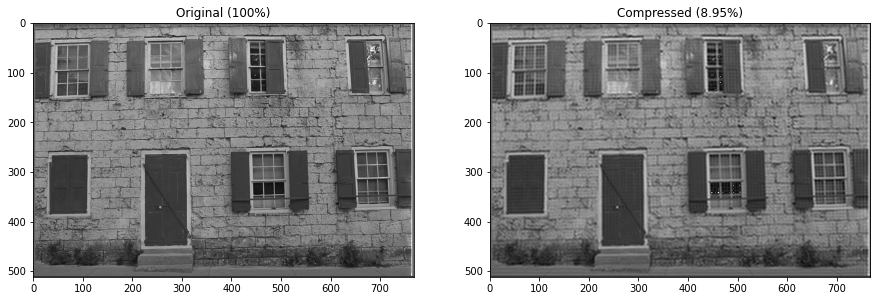

time: 548 ms


In [8]:
# compute compressed size
csize = 100.0 * (cutoff_x*cutoff_y) / (W*H)

# show reconstructed image
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 10)
# original image
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original (100%)')
# compressed image
ax[1].imshow(rec, cmap='gray')
ax[1].set_title('Compressed ({:0.2f}%)'.format(csize))
plt.show()

## Analysis

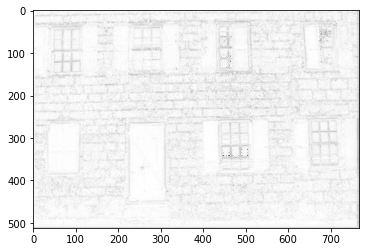

time: 409 ms


In [9]:
# show the pixel difference between the original and reconstructed images
plt.imshow(256 - abs(img - rec), cmap='gray')

In [10]:
# compression ratio in %
100 - 100.0 * (cutoff_x*cutoff_y) / (W*H)

91.05072021484375

time: 11.9 ms


Conclusion: The compressed image was compressed by ~91%, i.e. requires about 9% of the original storage size.